# Black Friday Data
## Table of Contents
<ul>
<li>Introduction</li>
<li>Importing The Libraries</li>
<li>Reading The Data</li>
<li>Data Inspection</li>
<li>Data Cleaning</li>
<li>Exploratory Data Analysis (EDA)</li>
<li> Feature Transformations</li>
<li>Building Model</li>
<li>Evaluating Model Performance</li>
<li>Conclusion</li>
</ul>

# Introduction

> In this project my target is predicting purchase amount by using the black friday dataset, this dataset consists of sales transactions that captured at a retail store.

# Importing The Libraries

In [538]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from datasist.structdata import detect_outliers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")
sns.set(rc={"figure.figsize":[7,7]},font_scale=1.1)

# Reading The Data

In [2]:
df=pd.read_csv("black_friday_data.csv")

In [3]:
#Displaying the first five rows from the data
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


# Data Inspection

In [4]:
#The shape of the data
df.shape

(22894, 12)

In [5]:
#Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22894 entries, 0 to 22893
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     22894 non-null  int64  
 1   Product_ID                  22894 non-null  object 
 2   Gender                      22894 non-null  object 
 3   Age                         22894 non-null  object 
 4   Occupation                  22894 non-null  int64  
 5   City_Category               22894 non-null  object 
 6   Stay_In_Current_City_Years  22894 non-null  object 
 7   Marital_Status              22894 non-null  int64  
 8   Product_Category_1          22894 non-null  int64  
 9   Product_Category_2          12804 non-null  float64
 10  Product_Category_3          5576 non-null   float64
 11  Purchase                    22894 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 2.1+ MB


- Categorical features : 5
- Numerical features : 7
- Product_Category_2 has missing data
- Product_Category_3 has missing data

In [6]:
((df.isna().sum())/df.shape[0])*100

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            44.072683
Product_Category_3            75.644274
Purchase                       0.000000
dtype: float64

- Product_Category_2 has 44% of missing values
- Product_Category_3 has 75.6% of missing values 

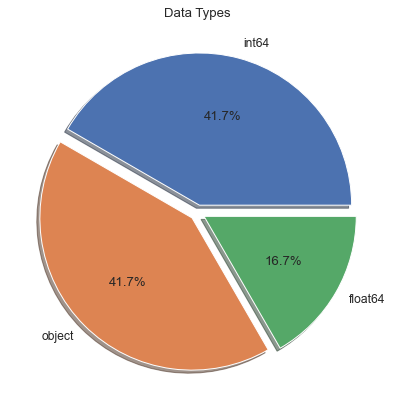

In [7]:
df.dtypes.value_counts().plot.pie(shadow=True,explode=[0.05,0.05,0.05],autopct='%1.1f%%')
plt.ylabel("")
plt.title("Data Types")
plt.show()

- Numerical data much than categorical data 

In [8]:
#Statistical description for the data
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,2.289400e+04,22894.000000,22894.000000,22894.000000,12804.000000,5576.00000,22894.000000
mean,1.002395e+06,8.196034,0.411068,7.929021,9.823571,12.70373,7617.078580
std,1.325179e+03,6.521526,0.492038,6.467299,5.061771,4.11238,5651.423679
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.00000,12.000000
25%,1.001394e+06,3.000000,0.000000,3.000000,5.000000,9.00000,3472.000000
50%,1.002131e+06,7.000000,0.000000,5.000000,9.000000,14.00000,7118.000000
75%,1.003051e+06,14.000000,1.000000,11.000000,15.000000,16.00000,11396.750000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.00000,23940.000000


# Data Cleaning

In [9]:
imputer=SimpleImputer(strategy="most_frequent")
df["Product_Category_2"]=imputer.fit_transform(df[["Product_Category_2"]])
df["Product_Category_3"]=imputer.fit_transform(df[["Product_Category_3"]])

In [10]:
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

- Data are clean

# Exploratory Data Analysis (EDA)

In [11]:
def cntplt(data,x,palette,title,y=None,hue=None):
    '''
    This function for showing the counts of observations in each categorical value.
    INPUT:
    data: DataFrame. The dataset.
    x: str. Feature name in the dataset.
    y: str. Feature name in the dataset.
    palette: str. Palette name.
    title: str. Countplot title.
    hue: str. Feature name in the dataset.
    OUTPUT:
    Countplot represent the counts of observations in each categorical value.
    '''
    sns.countplot(data=data,x=x,y=y,hue=hue,palette=palette)
    plt.ylabel("Count")
    plt.title(title.title())
    plt.show()

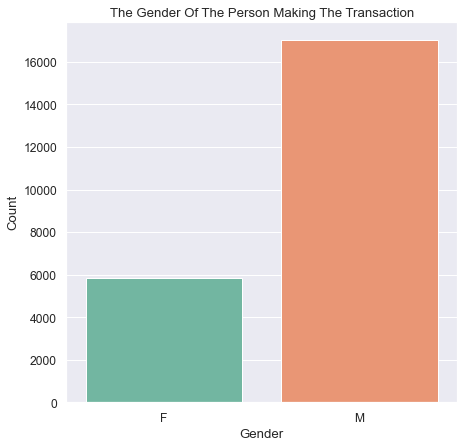

In [12]:
cntplt(df,"Gender","Set2","the gender of the person making the transaction")

- Most transactions by males

In [13]:
def bxplot(data,x,palette,title,y=None,hue=None):
    '''
    This function for showing distributions with respect to categories.
    INPUT:
    data: DataFrame. The dataset.
    x: str. Feature name in the dataset.
    y: str. Feature name in the dataset.
    palette: str. Palette name.
    title: str. Countplot title.
    hue: str. Feature name in the dataset.
    OUTPUT:
    Boxplot represent the distributions with respect to categories.
    '''
    sns.boxplot(data=data,x=x,y=y,hue=hue,palette=palette)
    plt.title(title.title())
    plt.show()

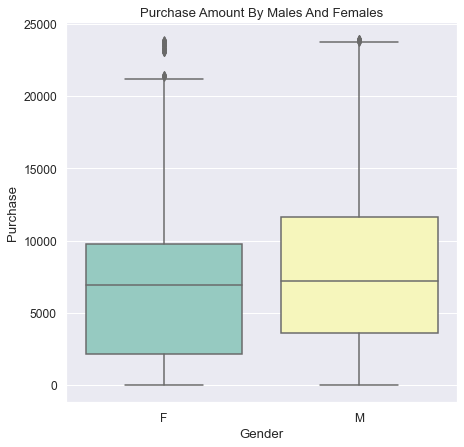

In [14]:
bxplot(df,"Gender","Set3","purchase amount by males and females",y="Purchase")

- The range of purchases amount in males higher than females 

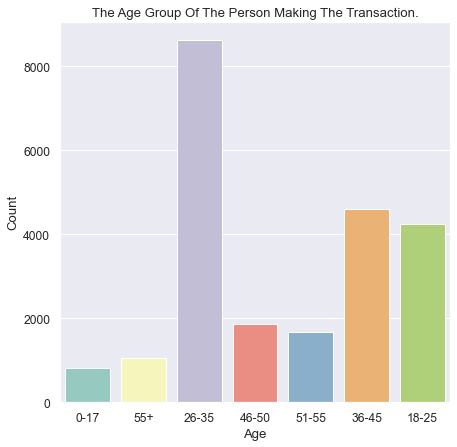

In [15]:
cntplt(df,"Age","Set3","the age group of the person making the transaction.")

- Ages from 26-35 have higher transactions

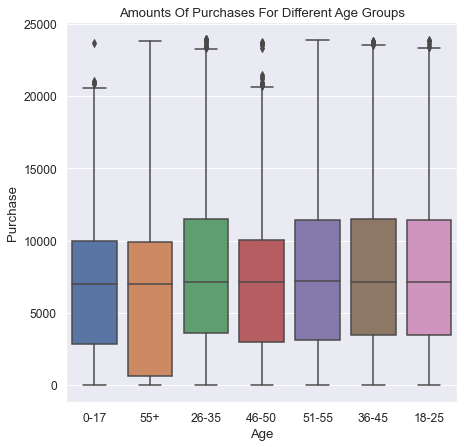

In [16]:
bxplot(df,"Age","deep","amounts of purchases for different age groups",y="Purchase")

- Ages from 51-55 have higher amount of purchases

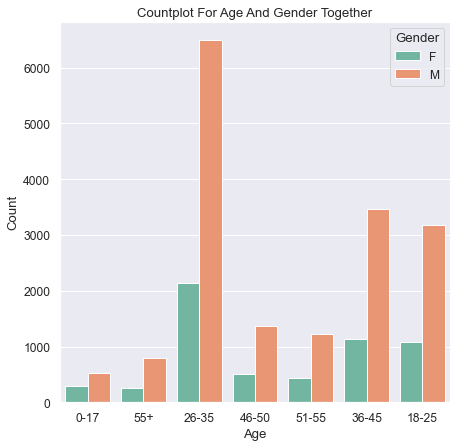

In [17]:
cntplt(df,"Age","Set2","countplot for age and gender together",hue="Gender")

- Most transactions in this data by males at the age 26-35
- Most transactions for females are limited to the age of 26-35

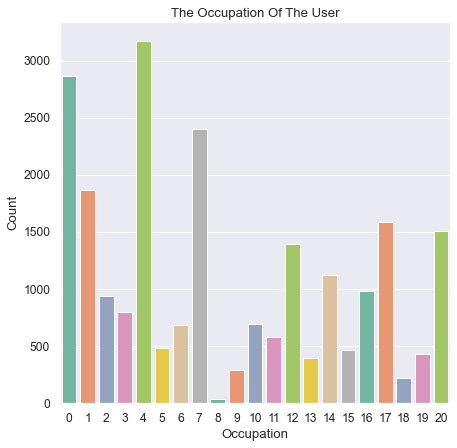

In [18]:
cntplt(df,"Occupation","Set2","the occupation of the user")

- Most transactions from the occupation 4

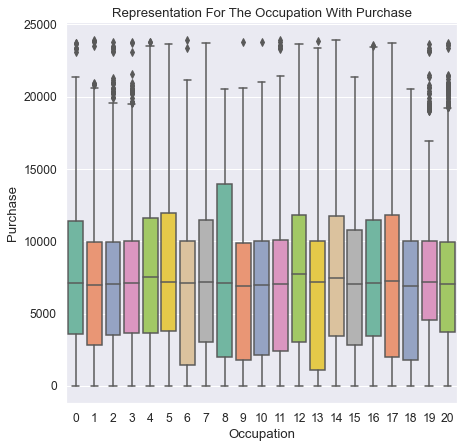

In [19]:
bxplot(df,"Occupation","Set2","representation for the occupation with purchase","Purchase")

- Users working in the 14th occupation, they are the highest in purchases

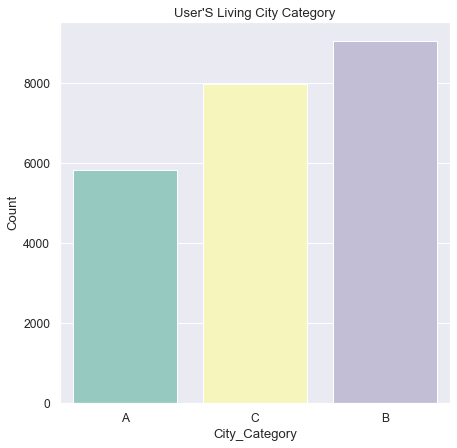

In [20]:
cntplt(df,"City_Category","Set3","user's living city category")

- Most people live in category B

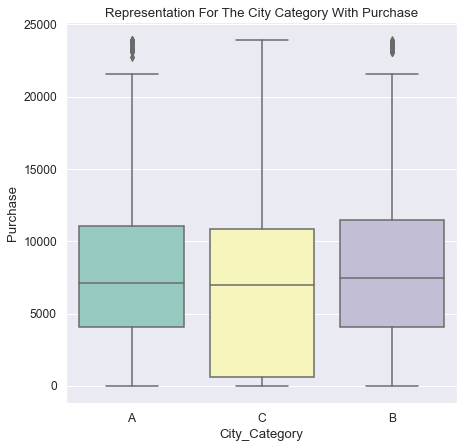

In [21]:
bxplot(df,"City_Category","Set3","representation for the city category with purchase","Purchase")

- Users living in the category C, they are the highest in purchases

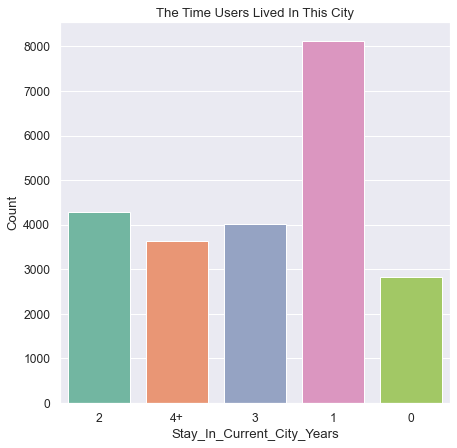

In [22]:
cntplt(df,"Stay_In_Current_City_Years","Set2","The time users lived in this city")

- Most people stayed in the current city for 1 year

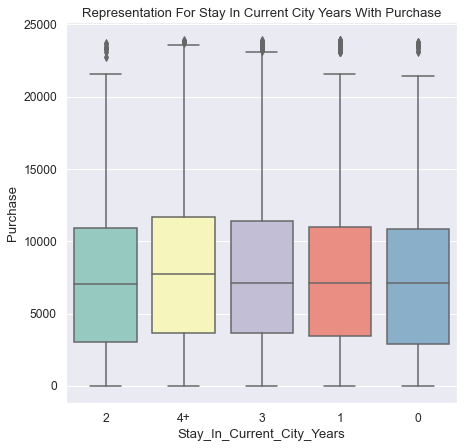

In [23]:
bxplot(df,"Stay_In_Current_City_Years","Set3","representation for stay in current city years with purchase","Purchase")

- People whose stayed 4+ years they are the highest in purchases 

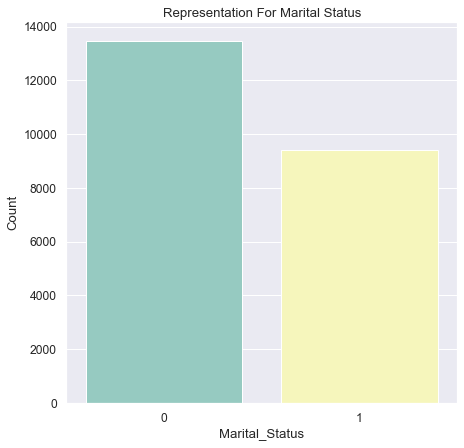

In [24]:
cntplt(df,"Marital_Status","Set3","Representation for marital status")

- Most users aren't married

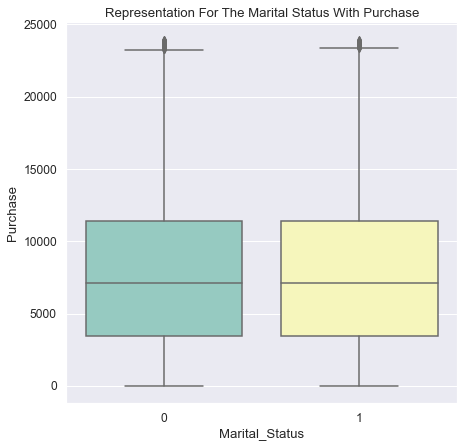

In [25]:
bxplot(df,"Marital_Status","Set3","representation for the marital status with purchase","Purchase")

- Married people they highest in purchases

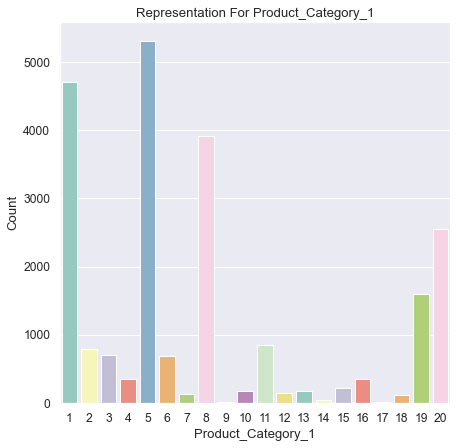

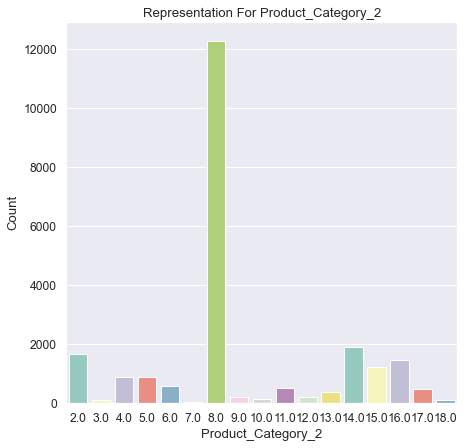

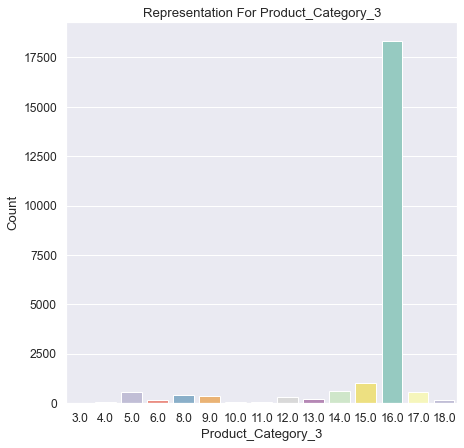

In [26]:
products=["Product_Category_1","Product_Category_2","Product_Category_3"]
for product in products:
    cntplt(df,product,"Set3","representation for "+product)

- The most transactions on Product 5 in product category 1 
- The most transactions on Product 8 in product category 2
- The most trancations on Product 16 in product category 3

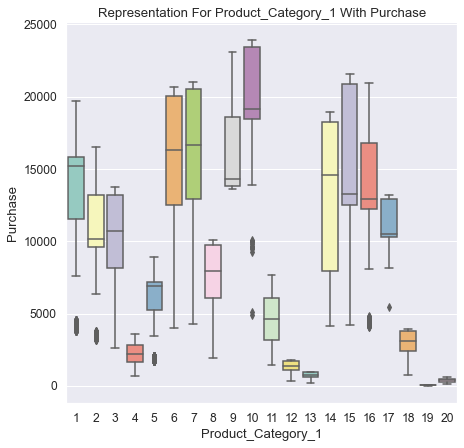

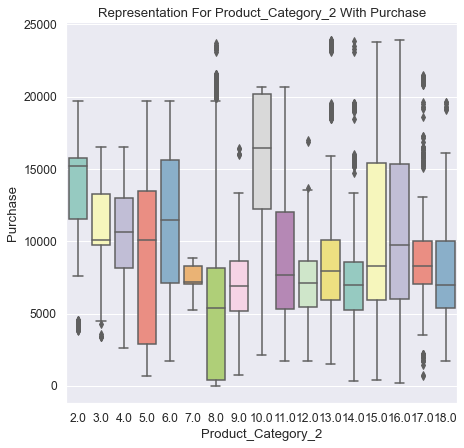

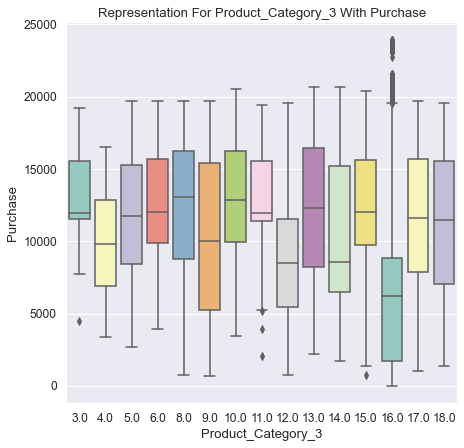

In [27]:
for product in products:
    bxplot(df,product,"Set3","representation for "+product+" with purchase",y="Purchase")

- The highest products in purchases are product 15, 16, 13 in product category 1, product category 2, product category 3 respectively

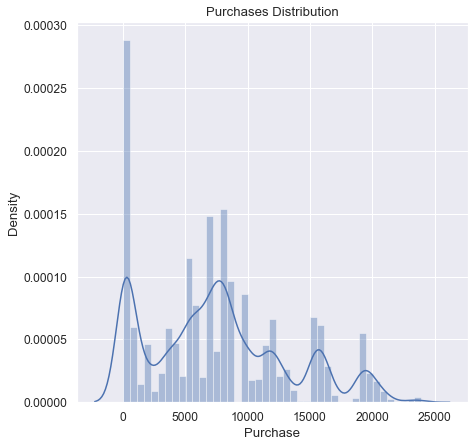

In [28]:
sns.distplot(df["Purchase"])
plt.title("Purchases Distribution")
plt.show()

- Purchases amount range from 12 to almost 24000  

# Feature Transformations

In [419]:
#Taking a copy from the dataset
df_new=df.copy()

In [440]:
#Detecting and dropping the outliers
outls_indcs=detect_outliers(df_new,0,["Product_Category_1","Purchase","Product_Category_2","Product_Category_3","Occupation"])
df_new.drop(outls_indcs,axis=0,inplace=True)

In [441]:
#Splitting the data to x and y
x=df_new.drop(["User_ID","Product_ID","Purchase"],axis=1)
y=df_new["Purchase"]

In [442]:
#Getting the dummies
x=pd.get_dummies(x,columns=["City_Category","Stay_In_Current_City_Years","Marital_Status","Gender","Age"],drop_first=True)

In [443]:
x.head()

,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,City_Category_B,City_Category_C,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+,Marital_Status_1,Gender_M,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+
0,10,3,8.0,16.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,10,12,8.0,16.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,10,12,14.0,16.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,16,8,8.0,16.0,0,1,0,0,0,1,0,1,0,0,0,0,0,1
7,7,1,15.0,16.0,1,0,0,1,0,0,1,1,0,0,0,1,0,0


In [444]:
y.head()

0     8370
2     1422
3     1057
4     7969
7    15854
Name: Purchase, dtype: int64

In [518]:
#Splitting the data for training and testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=45)

In [519]:
#Applying standard scaling
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

# Building Model

In [523]:
#Applying random forest regressor
model=RandomForestRegressor(n_estimators=120,max_depth=9)
model.fit(x_train,y_train)

RandomForestRegressor(max_depth=9, n_estimators=120)

# Evaluating Model Performance

In [537]:
print("Training Score: ",round(model.score(x_train,y_train)*100,2))
print("Testing Score: ",round(model.score(x_test,y_test)*100,2))

Training Score:  82.93
Testing Score:  81.03


In [539]:
#Prediction values
y_pred=model.predict(x_test)

In [545]:
#R2
r2=r2_score(y_test,y_pred)
r2

0.8103159550595479

# Conclusion

> - User_ID and Product_ID plays an important part in the domain, but they don't have any important part in machine learning model.
> - Getting the dummies very important for taking a real benefits from categorical data during machine learning model.
> - Standard scaler helps to get standardized distribution, and gives us good results.